## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [1]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ''

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [15]:
## 資料前處理
# 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
#  (v - v.min()) / (v.max() - v.min())
"""
Your code here
"""
def preproc_x(x, flattern=True):
    x = (x-x.min())/(x.max()-x.min())
    if flattern:
        x = x.reshape((len(x), -1))
    return x
    

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [16]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [17]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 128, 128, 128, 256, 64]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model


model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 256)               33024     
__________

In [18]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 512

In [19]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [20]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 30s 594us/step - loss: 2.0103 - acc: 0.2534 - val_loss: 1.8224 - val_acc: 0.3436
Epoch 2/100
50000/50000 [==============================] - 28s 550us/step - loss: 1.7830 - acc: 0.3535 - val_loss: 1.6984 - val_acc: 0.3927
Epoch 3/100
50000/50000 [==============================] - 28s 557us/step - loss: 1.6920 - acc: 0.3881 - val_loss: 1.6450 - val_acc: 0.4095
Epoch 4/100
50000/50000 [==============================] - 30s 596us/step - loss: 1.6320 - acc: 0.4128 - val_loss: 1.6082 - val_acc: 0.4249
Epoch 5/100
50000/50000 [==============================] - 28s 565us/step - loss: 1.5816 - acc: 0.4302 - val_loss: 1.5840 - val_acc: 0.4339
Epoch 6/100
50000/50000 [==============================] - 27s 547us/step - loss: 1.5292 - acc: 0.4531 - val_loss: 1.5182 - val_acc: 0.4521
Epoch 7/100
50000/50000 [==============================] - 25s 492us/step - loss: 1.4858 - acc: 0.4677 - val_l

Epoch 59/100
50000/50000 [==============================] - 26s 528us/step - loss: 0.5622 - acc: 0.7956 - val_loss: 2.0899 - val_acc: 0.4963
Epoch 60/100
50000/50000 [==============================] - 26s 523us/step - loss: 0.5639 - acc: 0.7973 - val_loss: 2.0486 - val_acc: 0.5020
Epoch 61/100
50000/50000 [==============================] - 26s 527us/step - loss: 0.5451 - acc: 0.8018 - val_loss: 2.1008 - val_acc: 0.5009
Epoch 62/100
50000/50000 [==============================] - 26s 522us/step - loss: 0.5236 - acc: 0.8110 - val_loss: 2.0861 - val_acc: 0.4972
Epoch 63/100
50000/50000 [==============================] - 26s 514us/step - loss: 0.4998 - acc: 0.8214 - val_loss: 2.1788 - val_acc: 0.5000
Epoch 64/100
50000/50000 [==============================] - 26s 528us/step - loss: 0.4933 - acc: 0.8216 - val_loss: 2.2497 - val_acc: 0.4965
Epoch 65/100
50000/50000 [==============================] - 26s 516us/step - loss: 0.5006 - acc: 0.8203 - val_loss: 2.2975 - val_acc: 0.4919
Epoch 66/100


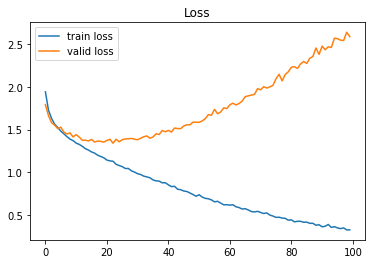

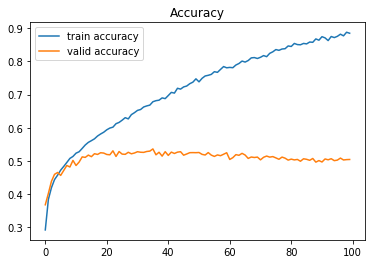

In [14]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()